## Brain-Tumor_Detection

In [6]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
!pip install keras-tuner


     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=9c3596d275bc6e3783ce1f8f565ebfb54c355202e754206ac71d5195582501a6
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=c830a480cc62035f81e5c9c2e0ba6bae1849251eb2dcf41d76b51f0c25ca25f5
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [9]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1/255)



val_datagen = ImageDataGenerator(rescale = 1/255)

In [12]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep learning CNN  Data Sets/Brain Tumor Detection/Brain_Tumor_Images_Dataset/training_set',
                                                 target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


test_data = test_datagen.flow_from_directory("/content/drive/MyDrive/Deep learning CNN  Data Sets/Brain Tumor Detection/Brain_Tumor_Images_Dataset/test_set",
                                                           batch_size=32,
                                                           target_size=(64,64),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)


val_data =  val_datagen.flow_from_directory("/content/drive/MyDrive/Deep learning CNN  Data Sets/Brain Tumor Detection/Brain_Tumor_Images_Dataset/validation_set",
                                            batch_size=32,
                                            target_size=(64,64),
                                            class_mode='sparse',
                                            shuffle=True,seed=1)
                                           

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [13]:
classes = {0:"hemmorhage_data",1:"non_hemmorhage_data"}
for i in classes.items():
    print(i)

(0, 'hemmorhage_data')
(1, 'non_hemmorhage_data')


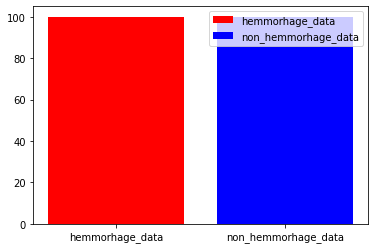

In [14]:
#visulaize data 
fig, ax = plt.subplots()
ax.bar("hemmorhage_data",100,label="hemmorhage_data",color="r")
ax.bar("non_hemmorhage_data",100,label="non_hemmorhage_data",color="b")
ax.legend()

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [16]:
#compile model
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


#early stop 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [17]:
#fit the model
history=model.fit(train_data,
    validation_data = val_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
5/5 [==============================] - 118s 24s/step - loss: 0.6706 - accuracy: 0.5857 - val_loss: 0.6440 - val_accuracy: 0.7250
Epoch 2/50
5/5 [==============================] - 1s 265ms/step - loss: 0.6506 - accuracy: 0.6643 - val_loss: 0.7196 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 1s 264ms/step - loss: 0.5831 - accuracy: 0.6929 - val_loss: 0.6146 - val_accuracy: 0.7000
Epoch 4/50
5/5 [==============================] - 1s 271ms/step - loss: 0.5091 - accuracy: 0.7429 - val_loss: 0.6618 - val_accuracy: 0.6250
Epoch 5/50
5/5 [==============================] - 1s 268ms/step - loss: 0.5519 - accuracy: 0.7143 - val_loss: 0.6736 - val_accuracy: 0.6250
Epoch 6/50
5/5 [==============================] - 1s 275ms/step - loss: 0.5543 - accuracy: 0.7357 - val_loss: 0.5487 - val_accuracy: 0.7000
Epoch 7/50
5/5 [==============================] - 1s 267ms/step - loss: 0.4349 - accuracy: 0.7929 - val_loss: 0.6062 - val_accuracy: 0.6500
Epoch 8/50
5/5 [====

In [18]:
#evaluate model
model.evaluate(test_data)

1/1 [==============================] - 0s 10ms/step - loss: 0.4612 - accuracy: 0.7000


[0.4612347483634949, 0.699999988079071]

In [19]:
#predict model
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

y_pred 

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

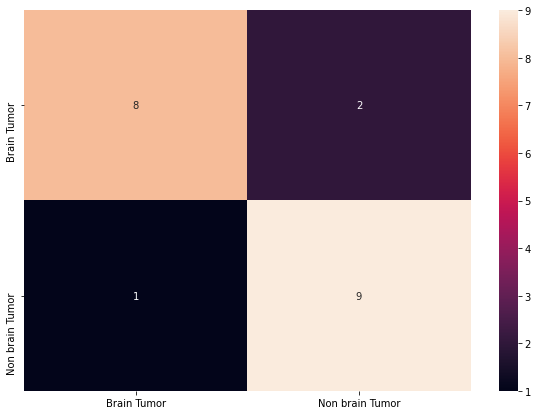

In [20]:
#plot confusion matrix
import seaborn as sn
array  = [[8,2],[1,9]]
l = ["Brain Tumor","Non brain Tumor"]
df_cm = pd.DataFrame(array, index = [i for i in  l],
                  columns = [i for i in l])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

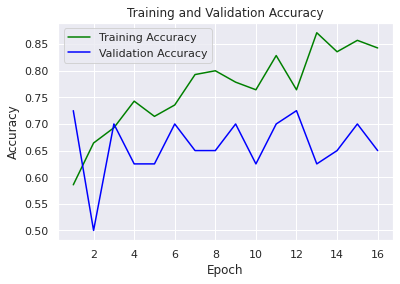

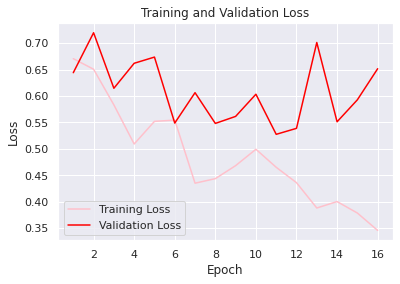

In [21]:
# plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


[[1. 0.]]
[0]
hemmorhage_data


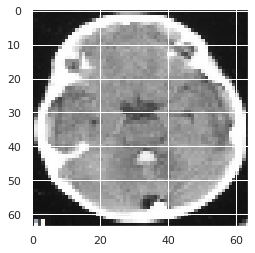

In [22]:
#test_ex1
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Deep learning CNN  Data Sets/Brain Tumor Detection/Brain_Tumor_Images_Dataset/training_set/hemmorhage_data/031.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[0. 1.]]
[1]
non_hemmorhage_data


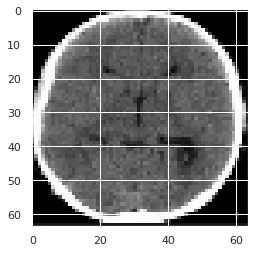

In [27]:
#test_ex2
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Deep learning CNN  Data Sets/Brain Tumor Detection/Brain_Tumor_Images_Dataset/test_set/non_hemmorhage_data/104.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[0]
hemmorhage_data


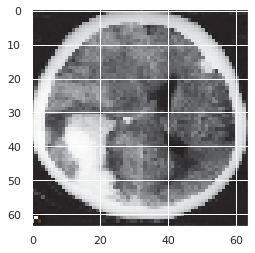

In [24]:
#test_ex3
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Deep learning CNN  Data Sets/Brain Tumor Detection/Brain_Tumor_Images_Dataset/validation_set/hemmorhage_data/013.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)